# 2. Reuters 딥러닝 모델

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [13]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [14]:
train_data_org = train_data
train_labels_org = train_labels

In [15]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_labels))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [17]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]]
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [18]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]

input_layer = tf.keras.layers.Input(shape=(10000, ))
x = tf.keras.layers.Dense(128)(input_layer)
x = tf.keras.layers.BatchNormalization(axis=1)(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.BatchNormalization(axis=1)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(46, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=outputs)


In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10000)]           0         
                                                                 
 dense_3 (Dense)             (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                           

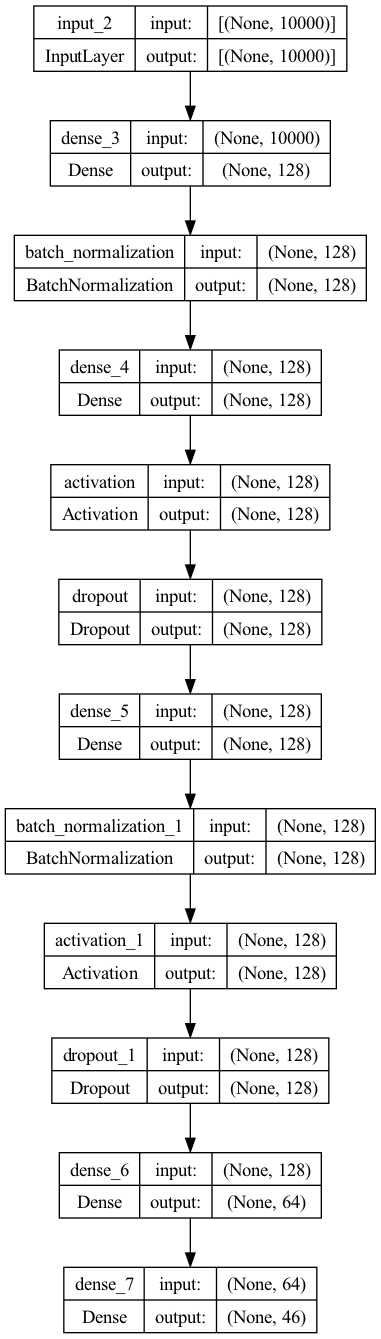

In [20]:
utils.plot_model(model, show_shapes=True)

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters_model.h5')
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

In [23]:
history = model.fit(x_train, y_train, epochs=30,
                    batch_size=512,
                    callbacks=[check_point_cb, early_stopping_cb],
                    validation_data=(x_val, y_val))

Epoch 1/30
14/14 [==============================] - 1s 59ms/step - loss: 2.8406 - accuracy: 0.4017 - val_loss: 3.3142 - val_accuracy: 0.5365
Epoch 2/30
 3/14 [=====>........................] - ETA: 0s - loss: 1.8507 - accuracy: 0.5833

/Users/salgu/miniconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 1s 44ms/step - loss: 1.6687 - accuracy: 0.6119 - val_loss: 2.7252 - val_accuracy: 0.6407
Epoch 3/30
14/14 [==============================] - 1s 49ms/step - loss: 1.2404 - accuracy: 0.7001 - val_loss: 2.4499 - val_accuracy: 0.7066
Epoch 4/30
14/14 [==============================] - 1s 41ms/step - loss: 0.9489 - accuracy: 0.7824 - val_loss: 2.2900 - val_accuracy: 0.7302
Epoch 5/30
14/14 [==============================] - 1s 45ms/step - loss: 0.7439 - accuracy: 0.8204 - val_loss: 2.0864 - val_accuracy: 0.7467
Epoch 6/30
14/14 [==============================] - 1s 40ms/step - loss: 0.5983 - accuracy: 0.8496 - val_loss: 1.9032 - val_accuracy: 0.7471
Epoch 7/30
14/14 [==============================] - 0s 26ms/step - loss: 0.4760 - accuracy: 0.8796 - val_loss: 1.7540 - val_accuracy: 0.7609
Epoch 8/30
14/14 [==============================] - 0s 35ms/step - loss: 0.3789 - accuracy: 0.9088 - val_loss: 1.5969 - val_accuracy: 0.7738
Epoch 9/30
14/14 [======

/var/folders/r0/w084nh2s0v3fstg3n70027500000gn/T/ipykernel_34254/1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


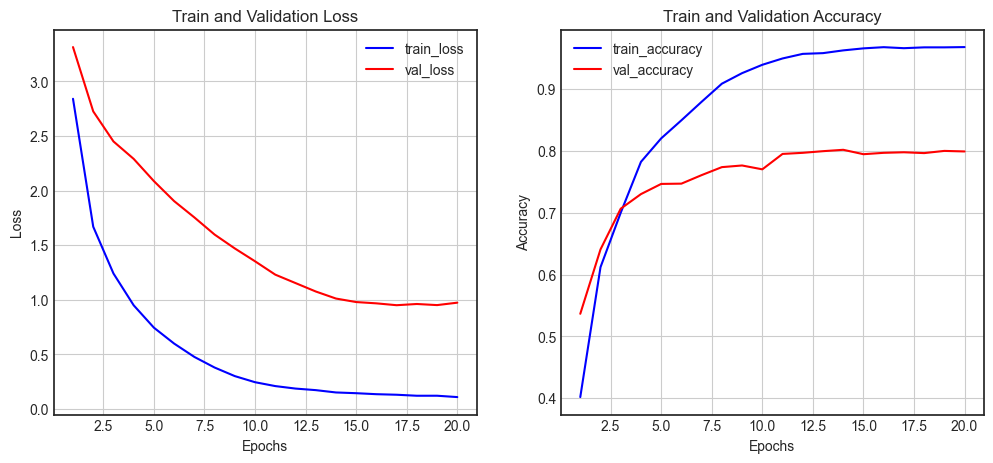

In [24]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.0454 - accuracy: 0.7872


[1.0453613996505737, 0.7871772050857544]

In [26]:
del model